task import  fashion images and try to predict the label of an image

In [1]:
import tensorflow as tf
from tensorflow import keras

In [2]:
# MNIST 70000 images scaled  28x28 px , 20 classes (types) - fashion
fashion=keras.datasets.fashion_mnist

In [6]:
# train test split
(X_train_full, y_train_full), (X_test, y_test) = fashion.load_data()

In [7]:
X_train_full.shape

(60000, 28, 28)

In [8]:
X_test.shape

(10000, 28, 28)

In [9]:
from matplotlib import pyplot

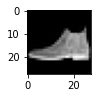

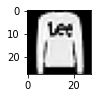

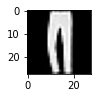

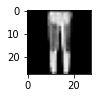

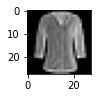

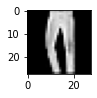

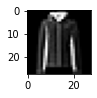

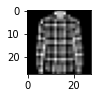

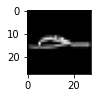

In [10]:
for i in range(9):
  pyplot.subplot(330+1+i)
  pyplot.imshow(X_test[i], cmap=pyplot.get_cmap('gray'))
  pyplot.show()

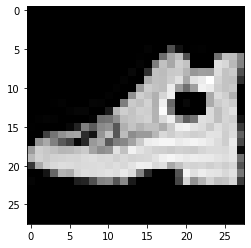

In [13]:
pyplot.imshow(X_train_full[32521], cmap=pyplot.get_cmap('gray'))

In [14]:
# pre processing because the model has requirements

# gradient descent training - needs image to be scaled / divided by 255

X_valid, X_train = X_train_full[:5000]/255.0 , X_train_full[5000:]/255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [40]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle Boot"]

In [42]:
class_names[y_test[3021]]

'Dress'

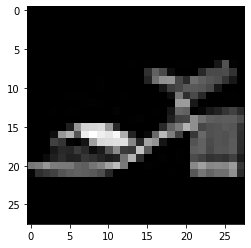

In [43]:
pyplot.imshow(X_train_full[3021], cmap=pyplot.get_cmap('gray'))

In [44]:
model=keras.models.Sequential()
# flatten image
# dense neuron layer (300, activation = relu - rectified linear activation -like linear regression-IFELSE)
# add a second dense neuron layer(100 relu)
# add final softmax layer (% certainity to a dress, or a shirt)

model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(300,activation="relu"))
model.add(keras.layers.Dense(100,activation="relu"))
model.add(keras.layers.Dense(10,activation='softmax'))

#warning -dense layers -you risk overfit if you have too many, if you apply too many hypermarkets

In [45]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])

In [47]:
history=model.fit(X_train,y_train, epochs=30, validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.2233 - accuracy: 0.9199 - val_loss: 0.2957 - val_accuracy: 0.8906
Epoch 2/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.2201 - accuracy: 0.9206 - val_loss: 0.3048 - val_accuracy: 0.8902
Epoch 3/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.2165 - accuracy: 0.9229 - val_loss: 0.2891 - val_accuracy: 0.8948
Epoch 4/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.2135 - accuracy: 0.9230 - val_loss: 0.2906 - val_accuracy: 0.8906
Epoch 5/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.2104 - accuracy: 0.9240 - val_loss: 0.3089 - val_accuracy: 0.8846
Epoch 6/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.2066 - accuracy: 0.9256 - val_loss: 0.2978 - val_accuracy: 0.8898
Epoch 7/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.2042 - accuracy: 0.9270 - val_loss: 0.2863 - val_accuracy:

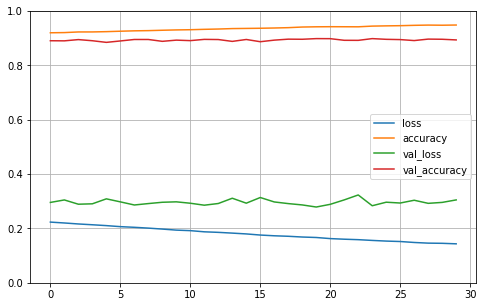

In [48]:
import pandas as pd 
pd.DataFrame(history.history).plot(figsize=(8,5))
pyplot.grid(True)
pyplot.gca().set_ylim(0,1)
pyplot.show()

In [49]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 92.9087 - accuracy: 0.8294


[92.90873718261719, 0.8294000029563904]

In [50]:
X_new=X_test[10:20] # pick a range of image from test

In [51]:
import numpy as np
y_pred=np.argmax(model.predict(X_new),axis=-1)
y_pred

array([4, 5, 5, 3, 4, 1, 2, 4, 8, 2])

In [52]:
np.array(class_names)[y_pred]

array(['Coat', 'Sandal', 'Sandal', 'Dress', 'Coat', 'Trouser', 'Pullover',
       'Coat', 'Bag', 'Pullover'], dtype='<U11')

In [53]:
y_new=y_test[10:20]
y_new

array([4, 5, 7, 3, 4, 1, 2, 4, 8, 0], dtype=uint8)

In [54]:
np.array(class_names)[y_new]

array(['Coat', 'Sandal', 'Sneaker', 'Dress', 'Coat', 'Trouser',
       'Pullover', 'Coat', 'Bag', 'T-shirt/top'], dtype='<U11')